In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import timeit
import time

import desitarget.cuts
import desitarget.io
from desitarget import desi_mask, bgs_mask

from astropy.io import fits
from astropy.table import Table, Row, vstack

In [3]:
# Get paths to all .fits files given a list of directories
# Make sure dirs is a list, even if it is of length 1
# THIS WAS RUN ON CORI -- 'DESI_DR2' is defined there

def get_file_paths(dirs, verbose=False):
        all_paths = []
        for i, dir in enumerate(dirs):
                if verbose:
                        print('Looking at directory {:s}'.format(dir))
                files = os.listdir(os.path.join(os.environ['DESI_DR2'], 'tractor', dir))
                files = [fi for fi in files if fi.endswith('.fits')]
                if verbose:
                        print('Returned {:d} files'.format(len(files)))
                for j, file in enumerate(files):
                        all_paths.append(os.path.join(os.environ['DESI_DR2'], 'tractor', dir, file))
        return all_paths
    

def get_fits(dirs):
   
    for i, dir in enumerate(dirs):
        path = get_file_paths([dir])

        all_lrgs = Table()
        all_elgs = Table()
        all_qsos = Table()
        all_bgs = Table()

        for i, pa in enumerate(path):
                desi_target, bgs_target, mws_target = cuts.apply_cuts(pa)
                t = Table.read(pa)

                lrgs = t[(desi_target & desi_mask.LRG).astype(bool)]
                elgs = t[(desi_target & desi_mask.ELG).astype(bool)]
                qsos = t[(desi_target & desi_mask.QSO).astype(bool)]
                bgs = t[(bgs_target & bgs_mask.BGS_BRIGHT).astype(bool)]

                all_lrgs = vstack([all_lrgs,lrgs])
                all_elgs = vstack([all_elgs,elgs])
                all_qsos = vstack([all_qsos, qsos])
                all_bgs = vstack([all_bgs, bgs])

        all_lrgs.write('lrg_cuts{}.fits'.format(dir), format='fits')
        all_elgs.write('elg_cuts{}.fits'.format(dir), format='fits')
        all_qsos.write('qso_cuts{}.fits'.format(dir), format='fits')
        all_bgs.write('bgs_cuts{}.fits'.format(dir), format='fits')

### Import the data

In [3]:
def make_table(directories, verbose=False):
        
    lrg_cuts = Table()
    elg_cuts = Table()
    qso_cuts = Table()
    bgs_cuts = Table()
    
    for i, direct in enumerate(directories):
        lrg_path = '/Users/belaabolfathi/Desktop/cuts/lrg_cuts{}.fits'.format(direct)
        elg_path = '/Users/belaabolfathi/Desktop/cuts/elg_cuts{}.fits'.format(direct)
        qso_path = '/Users/belaabolfathi/Desktop/cuts/qso_cuts{}.fits'.format(direct)
        bgs_path = '/Users/belaabolfathi/Desktop/cuts/bgs_cuts{}.fits'.format(direct)
        
        # Isolate object cuts that return empty tables
        
        lrgs = Table.read(lrg_path)
        elgs = Table.read(elg_path)
        qsos = Table.read(qso_path)
        bgs = Table.read(bgs_path)
        
        if len(lrgs) != 0:
            lrg_cuts = vstack([lrg_cuts, lrgs])
        if len(elgs) != 0:
            elg_cuts = vstack([elg_cuts, elgs])
        if len(qsos) != 0:
            qso_cuts = vstack([qso_cuts, qsos])
        if len(bgs) != 0:
            bgs_cuts = vstack([bgs_cuts, bgs])
    
        if verbose:
            print('Finished directory {}'.format(direct))
    return lrg_cuts, elg_cuts, qso_cuts, bgs_cuts

In [18]:
directories = ['000', '001', '002', '003', '004', '005', '006', '110', '111', '112', '113', 
               '114', '139', '140', '141', '142', '216', '217', '218', '219', '314', '315', 
               '316', '317']

lrgs, elgs, qsos, bgs = make_table(directories, verbose=True)

Finished directory 000
Finished directory 001


Finished directory 002


Finished directory 003
Finished directory 004


Finished directory 005
Finished directory 006


Finished directory 110
Finished directory 111
Finished directory 112
Finished directory 113
Finished directory 114
Finished directory 139
Finished directory 140
Finished directory 141
Finished directory 142
Finished directory 216


Finished directory 217
Finished directory 218
Finished directory 219


Finished directory 314
Finished directory 315
Finished directory 316
Finished directory 317


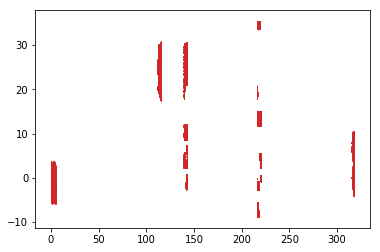

In [19]:
plt.scatter(lrgs['ra'], lrgs['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(elgs['ra'], elgs['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(qsos['ra'], qsos['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(bgs['ra'], bgs['dec'], alpha=0.3, lw=0, s=1)
plt.show()

In [20]:
print(len(lrgs), len(elgs), len(qsos), len(bgs))
print(len(lrgs)+len(elgs)+len(qsos)+len(bgs))

704249 379835 64986 242640
1391710


In [22]:
lrgs.write('lrg_cuts.fits')

In [25]:
elgs.write('elg_cuts.fits')

In [26]:
qsos.write('qso_cuts.fits')

In [27]:
bgs.write('bgs_cuts.fits')

In [28]:
!ls

apply_cuts.ipynb bgs_cuts.fits    lrg_cuts.fits    tractor
apply_cuts.py    elg_cuts.fits    qso_cuts.fits


### Original `all_cuts.fits`

In [18]:
# Compare against all_cuts.fits
cuts = Table.read('/Users/belaabolfathi/Downloads/all_cuts.fits')

In [19]:
lrg_targets = cuts['DESI_TARGET'] & desi_mask.LRG
elg_targets = cuts['DESI_TARGET'] & desi_mask.ELG
qso_targets = cuts['DESI_TARGET'] & desi_mask.QSO
bgs_targets = cuts['BGS_TARGET'] & bgs_mask.BGS_BRIGHT
lrgs = lrg_targets.astype(bool)
elgs = elg_targets.astype(bool)
qsos = qso_targets.astype(bool)
bgs = bgs_targets.astype(bool)

LRG = cuts[lrgs]
ELG = cuts[elgs]
QSO = cuts[qsos]
BGS = cuts[bgs]


In [20]:
len(cuts)

421326

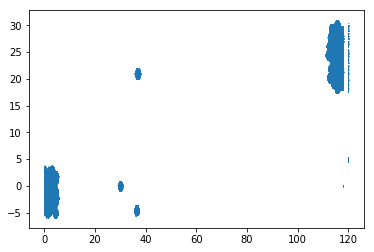

In [21]:
plt.scatter(cuts['RA'], cuts['DEC'], alpha=0.3, lw=0, s=1)
plt.show()

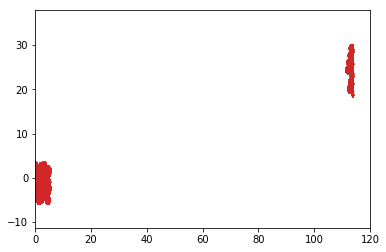

In [9]:
plt.scatter(lrgs['ra'], lrgs['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(elgs['ra'], elgs['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(qsos['ra'], qsos['dec'], alpha=0.3, lw=0, s=1)
plt.scatter(bgs['ra'], bgs['dec'], alpha=0.3, lw=0, s=1)
plt.xlim(0,120)
plt.show()